# Telecom Customer Churn Prediction Project

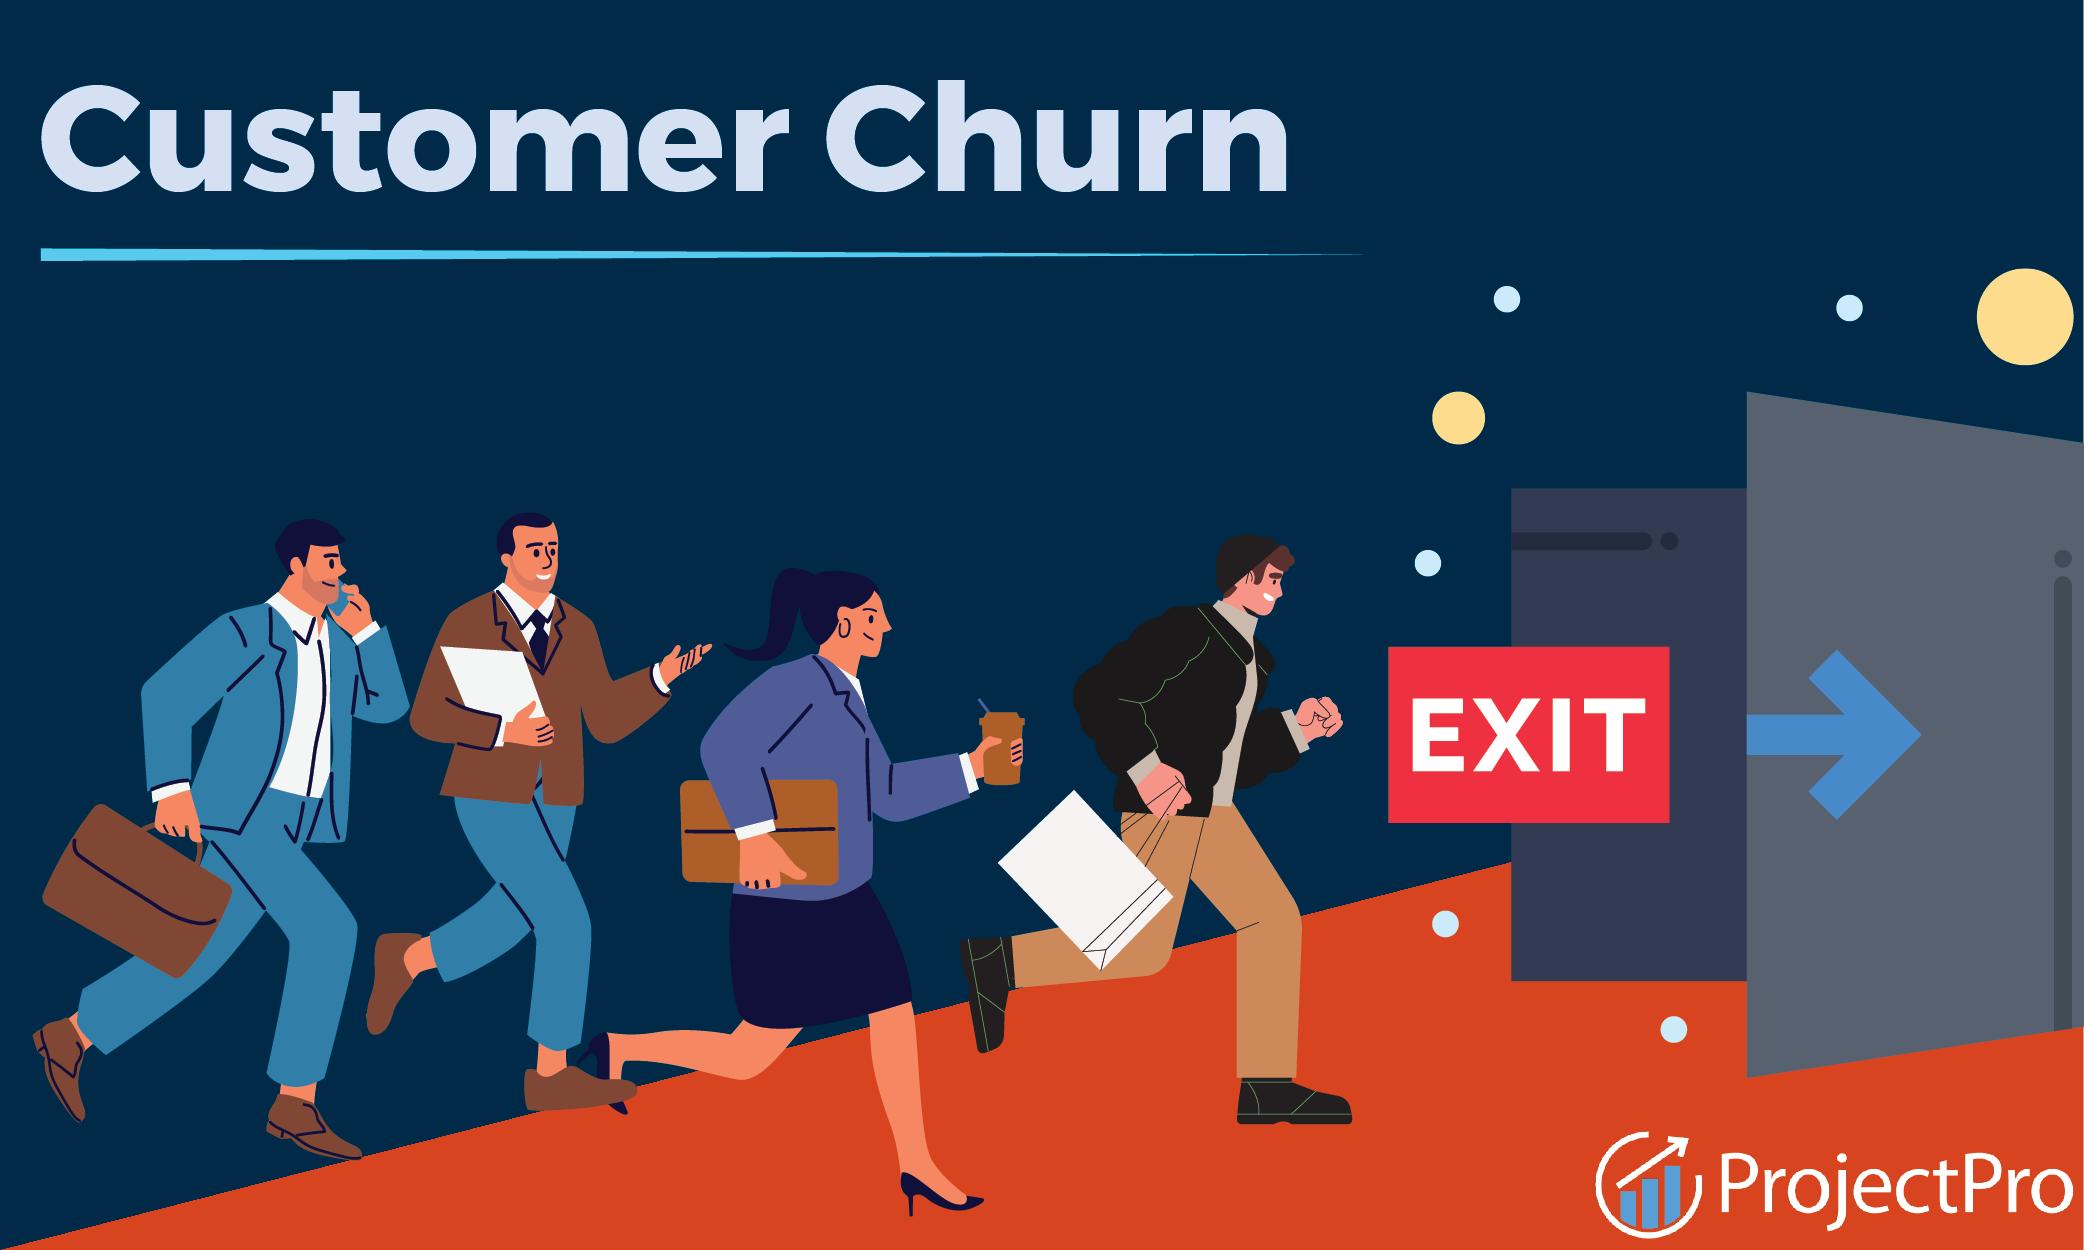

#### Churn Prediction is one of the most popular Big Data use cases in business. It consists of detecting customers who are likely to cancel subscription to a Service 
#### Churn is a problem for telecom companies because it is more expensive to acquire a new customer than to keep your existing one from leaving.



### Objective

1. To predict customer churn
2. Highlighting the main variables/factors influencing customer churn.
3. Use various ML algorithm to build predictive models, evaluate the accuracy and performance of these models.
4. Finding out the best model fot our business case and providing executive summary.

## Overview

The dataset comprises 7043 rows and 35 columns, containing various customer attributes and churn-related information.The dataset is taken from kaggle.

1. CustomerID: Unique identifier for each customer.
2. Count: Counter for each row.
3. Country: Country where the customer resides.
4. State: State where the customer resides.
5. City: City where the customer resides.
6. Zip_Code: Postal code of the customer's location.
7. Lat_long: Latitude and longitude coordinates of the customer's location.
8. Latitude: Latitude coordinate of the customer's location.
9. Longitude: Longitude coordinate of the customer's location.
10. Gender: Gender of the customer.
11. Senior_citizen: Indicator if the customer is a senior citizen (1) or not (0).
12. Partner: Whether the customer has a partner (Yes/No).
13. Dependents: Whether the customer has dependents (Yes/No).
14. Tenure_Months: Number of months the customer has been with the telecom company.
15. Phone_Service: Whether the customer has phone service (Yes/No).
16. Multiple_Lines: Whether the customer has multiple lines (Yes/No).
17. Internet_Service: Type of internet service subscribed by the customer.
18. Online_Security: Whether the customer has online security service (Yes/No).
19. Online_Backup: Whether the customer has online backup service (Yes/No).
20. Device_Protection: Whether the customer has device protection service (Yes/No).
21. Tech_Support: Whether the customer has technical support service (Yes/No).
22. Streaming_TV: Whether the customer has streaming TV service (Yes/No).
23. Streaming_Movies: Whether the customer has streaming movies service (Yes/No).
24. Contract: Type of contract subscribed by the customer (e.g., month-to-month, one year, two years).
25. Paperless_Billing: Whether the customer has opted for paperless billing (Yes/No).
26. Payment_Method: Payment method used by the customer.
27. Monthly_Charges: Monthly charges incurred by the customer.
28. Total_Charges: Total charges incurred by the customer.
29. Admin_Tickets: Number of administrative tickets raised by the customer.
30. Tech_tickets: Number of technical tickets raised by the customer.
31. Churn_Label: Label indicating churn status (Yes/No).
32. Churn: Indicator of churn (1 for churn, 0 for non-churn).
33. Churn_Score: Churn score assigned to the customer.
34. CLTV: Customer lifetime value.
35. Churn_Reason: Reason for churn (if applicable).



# Importing necessary libraries

In [100]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Sampling 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
#Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, r2_score , f1_score ,classification_report, confusion_matrix


from warnings import filterwarnings
filterwarnings('ignore')

### Set Options

In [101]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
# pd.options.display.max_rows = None

## Loading the Dataset

In [102]:
churn=pd.read_excel('Telco_customer_churn.xlsx')
churn

,CustomerID,Count,Country,State,City,Zip_Code,Lat_long,Latitude,Longitude,Gender,Senior_citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Admin_Tickets,Tech_tickets,Churn_Label,Churn,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,NaN,NaN,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0.0,0.0,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,0.0,0.0,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0.0,0.0,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,0.0,0.0,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0.0,0.0,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0.0,0.0,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0.0,0.0,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0.0,4.0,No,0,59,2793,NaN


### DATA DESCRIPTION

In [103]:
# Create a dictionary to store the information about the dataset

info_dict = {
    'Column': churn.columns.tolist(),    # Store the column names in a list
    'Non-Null Count': churn.count().tolist(), # Store the count of non-null values for each column
    'Dtype': churn.dtypes.tolist(), # Store the data types of each column
    'Null_Percentage' : np.round(( 7043 - churn.count()) * 100 / 7043) # Calculate the percentage of null values in each column
}
# Create a DataFrame from the info_dict dictionary
Description = pd.DataFrame(info_dict).reset_index(drop = True)
Description

,Column,Non-Null Count,Dtype,Null_Percentage
0,CustomerID,7043,object,0.0
1,Count,7043,int64,0.0
2,Country,7043,object,0.0
3,State,7043,object,0.0
4,City,7043,object,0.0
5,Zip_Code,7043,int64,0.0
6,Lat_long,7043,object,0.0
7,Latitude,7043,float64,0.0
8,Longitude,7043,float64,0.0
9,Gender,7043,object,0.0


# Exploratory Data Analysis

Exploratory Data Analysis (EDA), also known as Data Exploration, it is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In this step, we will perform the below operations:

### 3.1) understanding Your Variables
        3.1.1) Head of the dataset
        3.1.2) The shape of the dataset
        3.1.3) List types of all columns
        3.1.4) Info of the dataset
        3.1.5) Summary of the dataset
        3.1.6) Finding the proportion of binary class of target varibale to make the data is balanced
        
### 3.2) Data Cleaning
        3.2.1) Checking the Duplicates
        3.2.2) Check the Null values

### 3.1.1 Head of the dataset

In [104]:
churn.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_long,Latitude,Longitude,Gender,Senior_citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Admin_Tickets,Tech_tickets,Churn_Label,Churn,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,NaN,NaN,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0.0,0.0,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,0.0,0.0,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0.0,0.0,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,0.0,0.0,Yes,1,89,5340,Competitor had better devices


### 3.1.2. The shape of the dataset

In [105]:
churn.shape

(7043, 35)

### 3.1.3. List types of all columns

In [106]:
churn.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip_Code               int64
Lat_long              object
Latitude             float64
Longitude            float64
Gender                object
Senior_citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Admin_Tickets        float64
Tech_tickets         float64
Churn_Label           object
Churn                  int64
Churn_Score            int64
CLTV                   int64
Churn_Reason  

In [107]:
churn.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_long', 'Latitude', 'Longitude', 'Gender', 'Senior_citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Admin_Tickets', 'Tech_tickets',
       'Churn_Label', 'Churn', 'Churn_Score', 'CLTV', 'Churn_Reason'],
      dtype='object')

### 3.1.4. Info of the dataset

In [108]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip_Code           7043 non-null   int64  
 6   Lat_long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior_citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure_Months      7043 non-null   int64  
 14  Phone_Service      7043 non-null   object 
 15  Multiple_Lines     7043 non-null   object 
 16  Internet_Service   7043 

In [109]:
churn[churn.Total_Charges==' ']

,CustomerID,Count,Country,State,City,Zip_Code,Lat_long,Latitude,Longitude,Gender,Senior_citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Admin_Tickets,Tech_tickets,Churn_Label,Churn,Churn_Score,CLTV,Churn_Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0.0,0.0,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0.0,0.0,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0.0,0.0,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0.0,0.0,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0.0,0.0,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,6.0,0.0,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0.0,0.0,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0.0,0.0,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0.0,0.0,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0.0,0.0,No,0,44,2342,NaN


In [110]:
churn.Total_Charges.mode()

0    20.2
1        
Name: Total_Charges, dtype: object

In [111]:
churn.replace(' ',churn.Total_Charges.mode()[0],inplace=True)

In [112]:
churn.Total_Charges=churn.Total_Charges.astype('int')

In [113]:
churn.Total_Charges.mean()

2279.2963225898056

### 3.1.5. Summary of the dataset

In [114]:
churn.describe()

,Count,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Admin_Tickets,Tech_tickets,Churn,Churn_Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6958.000000,6972.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.296323,0.501868,0.410356,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.759589,1.363895,1.165601,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.000000,0.000000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.000000,0.000000,0.000000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.000000,0.000000,0.000000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.500000,0.000000,0.000000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.000000,6.000000,6.000000,1.000000,100.000000,6500.000000


## Summary statistics

#### ZIP Code (zip):
    
ZIP codes exhibit diverse values, with a average of 48,800.07. Transactions span various geographical locations based on ZIP codes


####  Latitude and Longitude:
    
Explains the location where churn rate is maximum i.e, 41.962127,-114.192901, and minimum churn is 32.555828,-124.301372.


#### Tenure_Months:
    
The tenure of customers in the churn dataset ranges from 0 to 72 months, with an average tenure of 33 months, suggesting a diverse range of customer relationships with the business.


#### CLTV:
    
The Customer Lifetime Value distribution ranges from 2003 to 6500, with a mean value of 4400, indicating variability in customer lifetime value across the dataset.  

#### Monthly_Charges:
    
The monthly charges in the churn dataset range from $18 to $118, with an average monthly charge of $64, indicating variability in pricing across customers.


### 3.1.6. Finding the proportion of binary class of target varibale to check whether the data is balanced

In [115]:
churn.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [116]:
churn.Churn.value_counts(normalize=True)*100

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

above data is slightly balanced

## 3.2 Data Cleaning

### 3.2.1. Checking the Duplicates

In [117]:
churn[churn.duplicated]

,CustomerID,Count,Country,State,City,Zip_Code,Lat_long,Latitude,Longitude,Gender,Senior_citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Admin_Tickets,Tech_tickets,Churn_Label,Churn,Churn_Score,CLTV,Churn_Reason


No duplicates

In [118]:
churn.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip_Code                0
Lat_long                0
Latitude                0
Longitude               0
Gender                  0
Senior_citizen          0
Partner                 0
Dependents              0
Tenure_Months           0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges           0
Admin_Tickets          85
Tech_tickets           71
Churn_Label             0
Churn                   0
Churn_Score             0
CLTV                    0
Churn_Reason         5174
dtype: int64

### 3.2.2 Checking null values

In [119]:
churn.Admin_Tickets.isnull().sum()

85

In [120]:
churn[churn.Admin_Tickets.isnull()]

,CustomerID,Count,Country,State,City,Zip_Code,Lat_long,Latitude,Longitude,Gender,Senior_citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Admin_Tickets,Tech_tickets,Churn_Label,Churn,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,NaN,NaN,Yes,1,86,3239,Competitor made better offer
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528,NaN,NaN,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39,NaN,NaN,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20,NaN,NaN,Yes,1,92,4832,Competitor made better offer
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30,NaN,NaN,Yes,1,97,2915,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,7134-HBPBS,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Female,Yes,No,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),108.10,7774,NaN,0.0,No,0,71,4474,NaN
6040,6370-ZVHDV,1,United States,California,Buellton,93427,"34.631362, -120.238218",34.631362,-120.238218,Female,No,Yes,No,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.30,1554,NaN,0.0,No,0,71,4501,NaN
6041,5915-DGNVC,1,United States,California,Cambria,93428,"35.591387, -121.032256",35.591387,-121.032256,Female,No,Yes,No,49,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,One year,No,Electronic check,71.80,3472,NaN,0.0,No,0,79,6193,NaN
6042,6260-XLACS,1,United States,California,Casmalia,93429,"34.866032, -120.536546",34.866032,-120.536546,Male,No,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.70,117,NaN,0.0,No,0,43,5018,NaN


In [121]:
churn.Admin_Tickets.mode()

0    0.0
Name: Admin_Tickets, dtype: float64

In [122]:
churn.Admin_Tickets.fillna(churn.Admin_Tickets.mode()[0],inplace=True)

In [123]:
churn[churn.Admin_Tickets.isnull()]

,CustomerID,Count,Country,State,City,Zip_Code,Lat_long,Latitude,Longitude,Gender,Senior_citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Admin_Tickets,Tech_tickets,Churn_Label,Churn,Churn_Score,CLTV,Churn_Reason


In [124]:
churn.Tech_tickets.isnull().sum()

71

In [125]:
churn[churn.Tech_tickets.isnull()]

,CustomerID,Count,Country,State,City,Zip_Code,Lat_long,Latitude,Longitude,Gender,Senior_citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Admin_Tickets,Tech_tickets,Churn_Label,Churn,Churn_Score,CLTV,Churn_Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,0.0,NaN,Yes,1,86,3239,Competitor made better offer
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528,0.0,NaN,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39,0.0,NaN,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20,0.0,NaN,Yes,1,92,4832,Competitor made better offer
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30,0.0,NaN,Yes,1,97,2915,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,2332-TODQS,1,United States,California,Garden Grove,92845,"33.782955, -118.026456",33.782955,-118.026456,Female,No,No,No,48,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),25.05,1171,0.0,NaN,No,0,33,3642,NaN
5584,4815-TUMEQ,1,United States,California,Lynwood,90262,"33.923573, -118.200669",33.923573,-118.200669,Female,No,No,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.30,185,0.0,NaN,No,0,38,4190,NaN
6428,2988-QRAJY,1,United States,California,Santa Rosa,95403,"38.488431, -122.752839",38.488431,-122.752839,Male,No,No,No,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),110.05,7430,5.0,NaN,No,0,30,5798,NaN
6429,0071-NDAFP,1,United States,California,Santa Rosa,95405,"38.439696, -122.668817",38.439696,-122.668817,Male,No,Yes,Yes,25,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.50,630,0.0,NaN,No,0,65,5230,NaN


In [126]:
churn.Tech_tickets.mode()

0    0.0
Name: Tech_tickets, dtype: float64

In [127]:
churn.Tech_tickets.fillna(churn.Tech_tickets.mode()[0],inplace=True)

In [128]:
churn[churn.Tech_tickets.isnull()]

,CustomerID,Count,Country,State,City,Zip_Code,Lat_long,Latitude,Longitude,Gender,Senior_citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Admin_Tickets,Tech_tickets,Churn_Label,Churn,Churn_Score,CLTV,Churn_Reason


In [129]:
churn.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip_Code                0
Lat_long                0
Latitude                0
Longitude               0
Gender                  0
Senior_citizen          0
Partner                 0
Dependents              0
Tenure_Months           0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges           0
Admin_Tickets           0
Tech_tickets            0
Churn_Label             0
Churn                   0
Churn_Score             0
CLTV                    0
Churn_Reason         5174
dtype: int64

In [130]:
churn.shape

(7043, 35)

In [131]:
churn.Churn_Reason.isnull().sum()

5174

In [132]:
5174/7043

0.7346301292063041

73% null value so we can drop that feature

In [133]:
churn.drop('Churn_Reason',axis=1,inplace=True)

In [134]:
churn.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip_Code             0
Lat_long             0
Latitude             0
Longitude            0
Gender               0
Senior_citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Admin_Tickets        0
Tech_tickets         0
Churn_Label          0
Churn                0
Churn_Score          0
CLTV                 0
dtype: int64

Dataset clean with zero duplicates and zero null values.

## Data Visualisation 

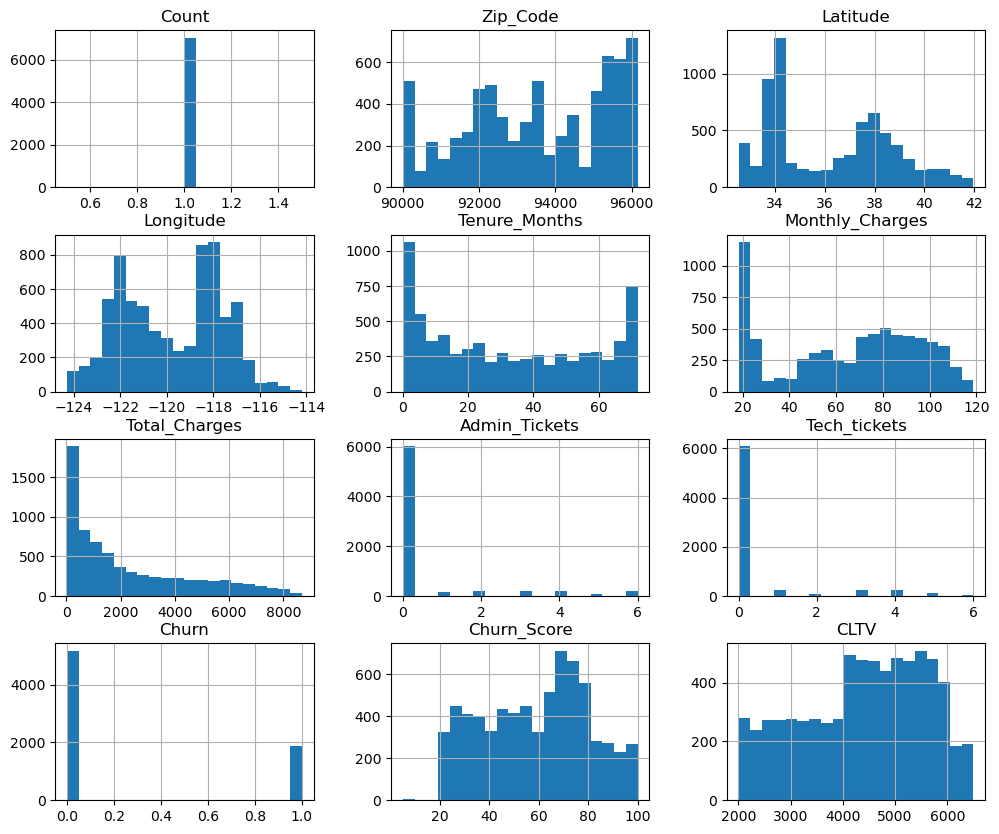

In [135]:
churn.hist(figsize=(12, 10), bins=20)
plt.show()

### Analyzing numerical features

Featuer Name = Tenure_Months


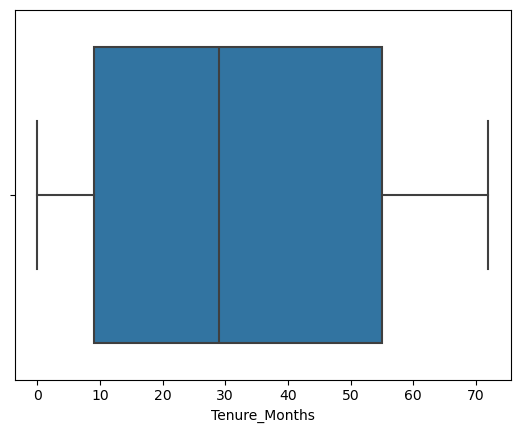

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure_Months, dtype: float64

Featuer Name = Monthly_Charges


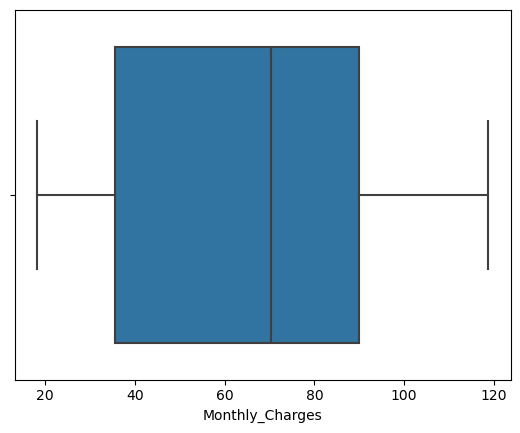

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly_Charges, dtype: float64

Featuer Name = Total_Charges


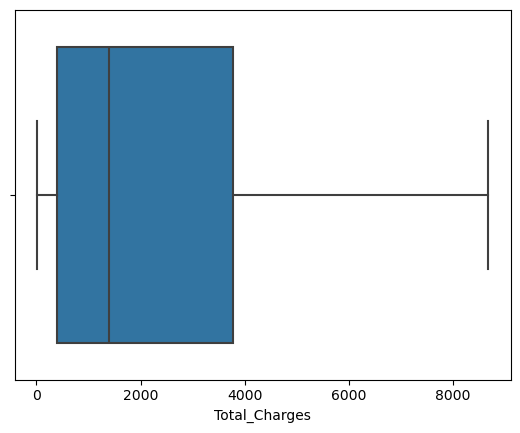

count    7043.000000
mean     2279.296323
std      2266.759589
min        18.000000
25%       398.000000
50%      1394.000000
75%      3786.500000
max      8684.000000
Name: Total_Charges, dtype: float64

Featuer Name = CLTV


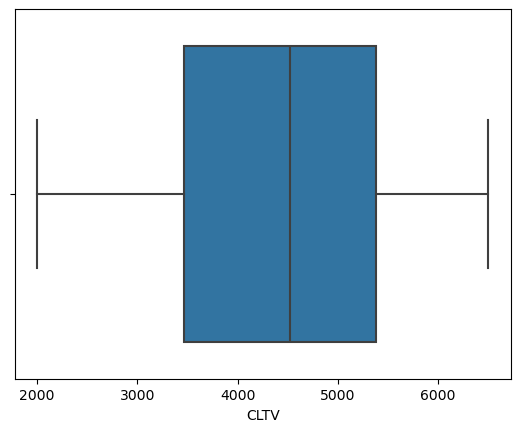

count    7043.000000
mean     4400.295755
std      1183.057152
min      2003.000000
25%      3469.000000
50%      4527.000000
75%      5380.500000
max      6500.000000
Name: CLTV, dtype: float64

In [136]:
num_cols = ['Tenure_Months','Monthly_Charges','Total_Charges','CLTV']

for i in num_cols:
    print(f'Featuer Name = {i}')
    sns.boxplot(x = churn[i])
    plt.show()
    display(churn[i].describe())

In [137]:
cat_cols = ['Country','State','City','Zip_Code','Gender','Senior_citizen','Partner','Dependents','Phone_Service','Multiple_Lines','Internet_Service','Online_Security','Online_Backup','Device_Protection','Tech_Support','Streaming_TV','Streaming_Movies','Contract','Paperless_Billing','Payment_Method']

for i in cat_cols:
    print(churn[i].value_counts())
    print(f'There are totaly {churn[i].nunique()} unique {i}')
    print()

Country
United States    7043
Name: count, dtype: int64
There are totaly 1 unique Country

State
California    7043
Name: count, dtype: int64
There are totaly 1 unique State

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64
There are totaly 1129 unique City

Zip_Code
90003    5
91436    5
91916    5
91913    5
91911    5
        ..
95303    4
95251    4
95250    4
95246    4
96146    4
Name: count, Length: 1652, dtype: int64
There are totaly 1652 unique Zip_Code

Gender
Male      3555
Female    3488
Name: count, dtype: int64
There are totaly 2 unique Gender

Senior_citizen
No     5901
Yes    1142
Name: count, dtype: int64
There are totaly 2 unique Senior_citizen

Partner
No     3641
Yes    3402
Name: count, dtype: int64
There are totaly 2 unique Partne

## Analyzing churn and non churn billing

In [138]:
churn_billing=churn[churn.Churn==1]
non_churn_billing=churn[churn.Churn==0]

display(churn_billing['Total_Charges'].describe())
display(non_churn_billing['Total_Charges'].describe())

display(churn_billing['Monthly_Charges'].describe())
display(non_churn_billing['Monthly_Charges'].describe())

count    1869.000000
mean     1531.323167
std      1890.823820
min        18.000000
25%       134.000000
50%       703.000000
75%      2331.000000
max      8684.000000
Name: Total_Charges, dtype: float64

count    5174.000000
mean     2549.486084
std      2329.902260
min        18.000000
25%       572.250000
50%      1679.000000
75%      4262.500000
max      8672.000000
Name: Total_Charges, dtype: float64

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: Monthly_Charges, dtype: float64

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: Monthly_Charges, dtype: float64

1. Highest total charges and monthly charges of customers who are not churned the company are $         
8672 USD and  $   118.350000 USD respectively .
2. Highest total charges and monthly charges of customers who are churned the company are $    
  8684.000000 USD and $ 118.350000 USD respectively
3. By observing the summary, both cutomers who churn and non-churn are paying approximately sames amount of charges.

<Axes: xlabel='Churn', ylabel='count'>

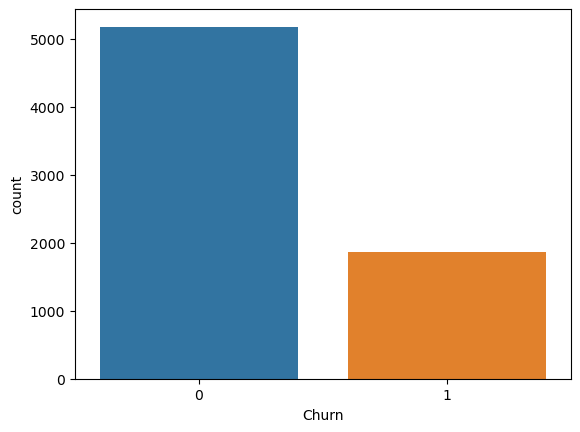

In [140]:
sns.countplot(x=churn.Churn)

Gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64

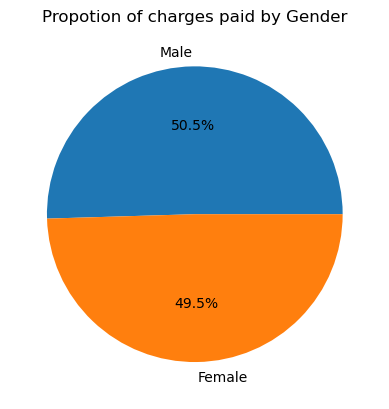

In [43]:
# Count the number of charges for each gender

gender_count = churn['Gender'].value_counts()
display(churn['Gender'].value_counts(normalize = True) *100)

# Ploting Pie Chart

plt.pie(gender_count,labels = gender_count.index,autopct = '%1.1f%%')
plt.title('Propotion of charges paid by Gender')
plt.show()

In the churn dataset, males account for approximately 50.48% of the charges paid, while females account for about 49.52%, suggesting a nearly equal distribution of charges paid between genders.

In [44]:
churn.groupby('Gender')['Monthly_Charges'].mean()

Gender
Female    65.204243
Male      64.327482
Name: Monthly_Charges, dtype: float64

Both male and female have made same average amount that is approximately $65

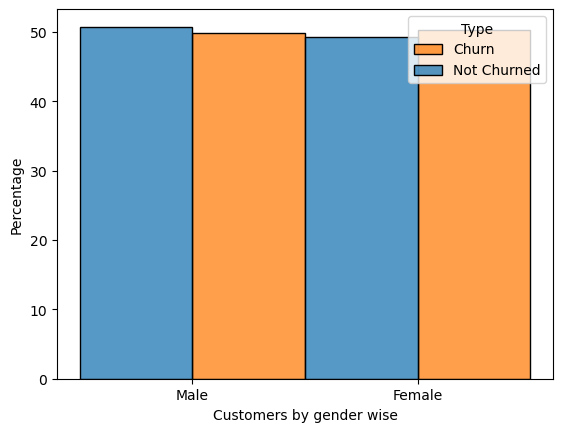

In [45]:
#Gender vs Fraud
sns.histplot(x = 'Gender',data = churn,hue = 'Churn',stat = 'percent',multiple = 'dodge',common_norm = False)
plt.xlabel('Customers by gender wise')
plt.ylabel('Percentage')
plt.legend(title = 'Type',labels = ['Churn','Not Churned'])

### Monthly Charges

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

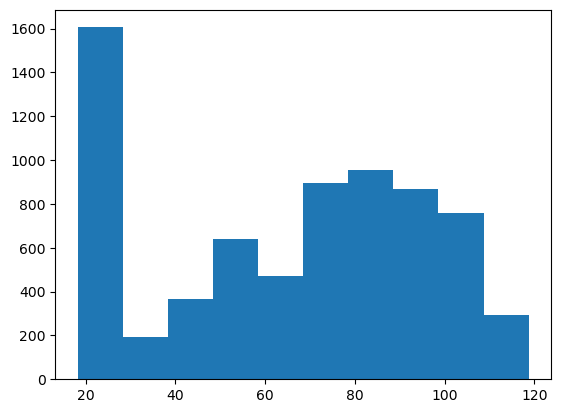

In [46]:
plt.hist(churn.Monthly_Charges)

In [47]:
churn.Monthly_Charges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly_Charges, dtype: float64

We can see that most of the transaction amount that has been fallowing less than $1000

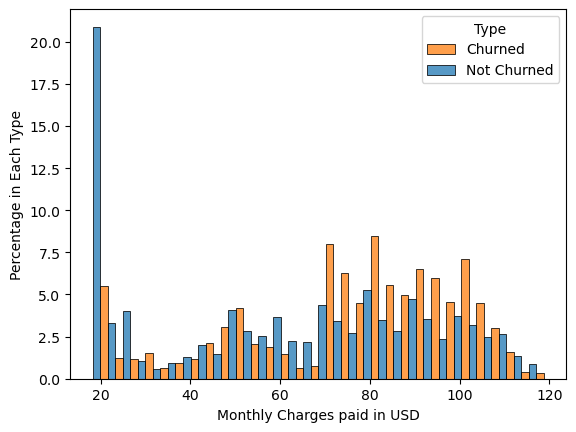

In [48]:
sns.histplot(x = 'Monthly_Charges',data = churn,hue = 'Churn',stat = 'percent',multiple = 'dodge',common_norm = False,bins = 30)
plt.xlabel('Monthly Charges paid in USD')
plt.ylabel('Percentage in Each Type')
plt.legend(title = 'Type', labels = ['Churned','Not Churned'])


Churn rate is high after $70

### Total Charges

(array([2720., 1228.,  670.,  509.,  454.,  412.,  395.,  309.,  224.,
         122.]),
 array([  18. ,  884.6, 1751.2, 2617.8, 3484.4, 4351. , 5217.6, 6084.2,
        6950.8, 7817.4, 8684. ]),
 <BarContainer object of 10 artists>)

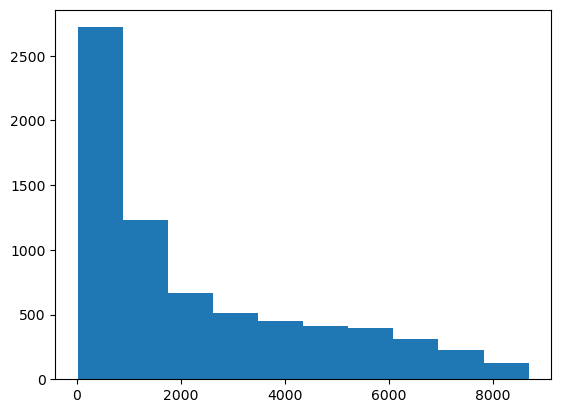

In [49]:
plt.hist(churn.Total_Charges)

<Axes: xlabel='Total_Charges', ylabel='Density'>

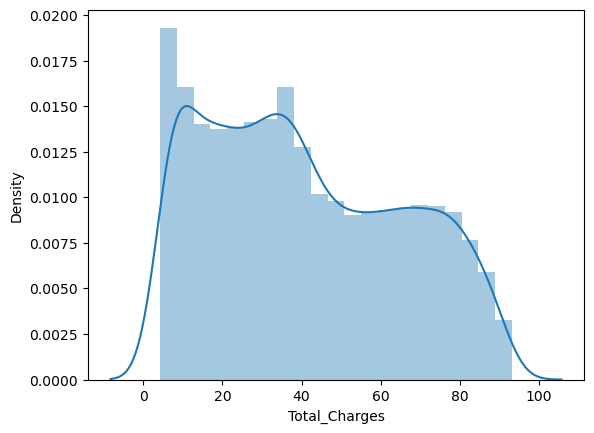

In [50]:
sns.distplot(np.sqrt(churn.Total_Charges))

In [51]:
churn.Total_Charges.describe()

count    7043.000000
mean     2279.296323
std      2266.759589
min        18.000000
25%       398.000000
50%      1394.000000
75%      3786.500000
max      8684.000000
Name: Total_Charges, dtype: float64

We can see that most of the transaction amount that has been fallowing less than $1000

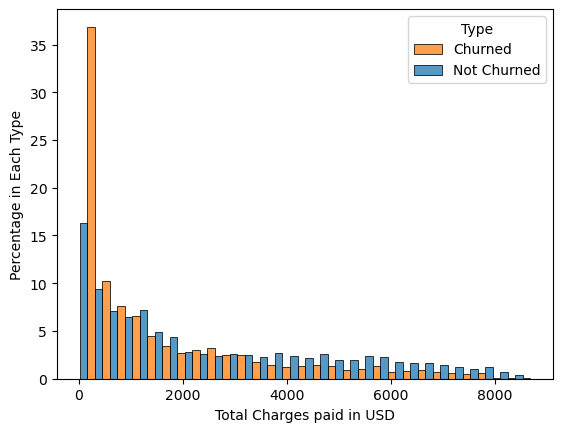

In [52]:
sns.histplot(x = 'Total_Charges',data = churn,hue = 'Churn',stat = 'percent',multiple = 'dodge',common_norm = False,bins = 30)
plt.xlabel('Total Charges paid in USD')
plt.ylabel('Percentage in Each Type')
plt.legend(title = 'Type', labels = ['Churned','Not Churned'])


In [53]:
churn.groupby("City").Churn.value_counts()

City          Churn
Acampo        1        3
              0        1
Acton         0        4
Adelanto      0        4
              1        1
                      ..
Yucaipa       0        3
              1        1
Yucca Valley  0        5
Zenia         0        3
              1        1
Name: count, Length: 1950, dtype: int64

In [54]:
churn.groupby("Internet_Service").Churn.value_counts()

Internet_Service  Churn
DSL               0        1962
                  1         459
Fiber optic       0        1799
                  1        1297
No                0        1413
                  1         113
Name: count, dtype: int64

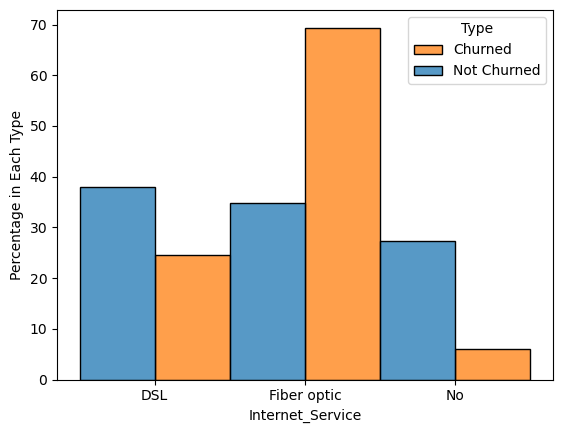

In [55]:
sns.histplot(x = 'Internet_Service',data = churn,hue = 'Churn',stat = 'percent',multiple = 'dodge',common_norm = False,bins = 30)
plt.xlabel('Internet_Service')
plt.ylabel('Percentage in Each Type')
plt.legend(title = 'Type', labels = ['Churned','Not Churned'])


In [56]:
churn.head(2)

,CustomerID,Count,Country,State,City,Zip_Code,Lat_long,Latitude,Longitude,Gender,Senior_citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Admin_Tickets,Tech_tickets,Churn_Label,Churn,Churn_Score,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,0.0,0.0,Yes,1,86,3239
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,0.0,0.0,Yes,1,67,2701


Senior_citizen
Senior_citizen  Churn
No              0        4508
                1        1393
Yes             0         666
                1         476
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


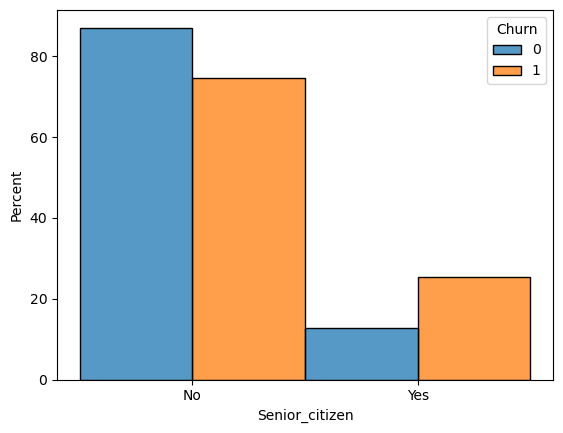

Partner
Partner  Churn
No       0        2441
         1        1200
Yes      0        2733
         1         669
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


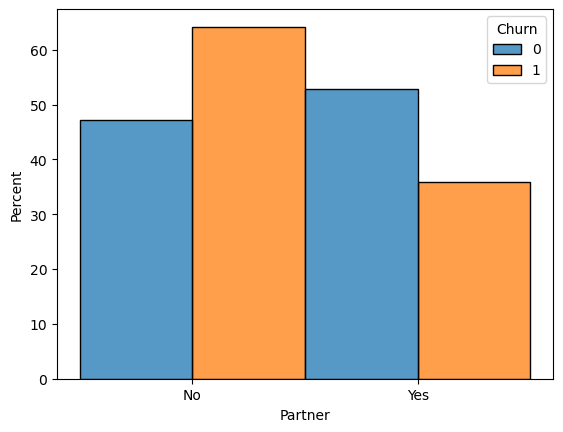

Dependents
Dependents  Churn
No          0        3653
            1        1763
Yes         0        1521
            1         106
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


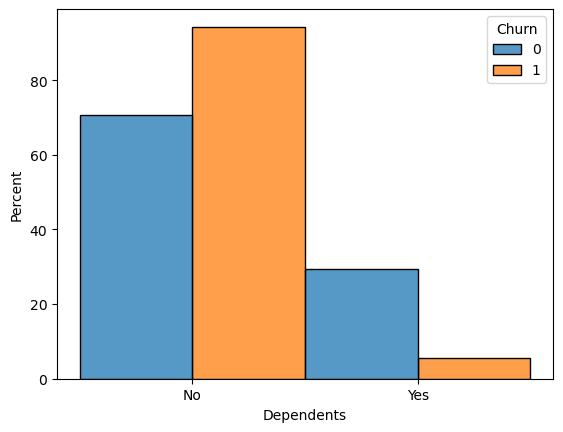

Phone_Service
Phone_Service  Churn
No             0         512
               1         170
Yes            0        4662
               1        1699
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


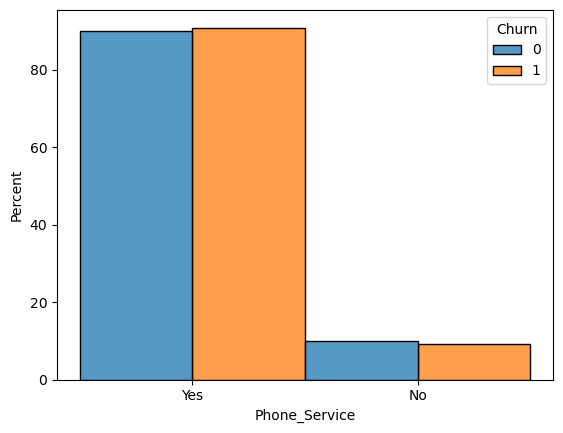

Multiple_Lines
Multiple_Lines    Churn
No                0        2541
                  1         849
No phone service  0         512
                  1         170
Yes               0        2121
                  1         850
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


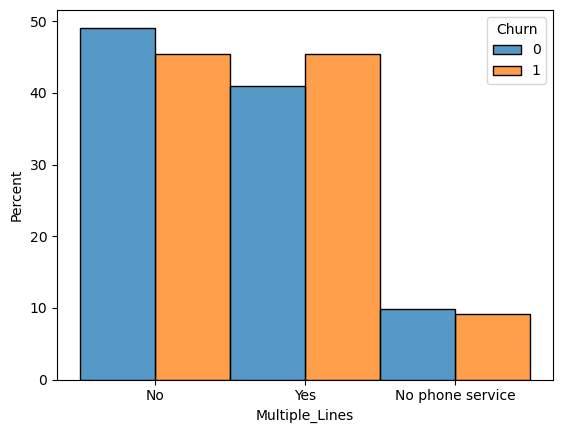

Online_Security
Online_Security      Churn
No                   0        2037
                     1        1461
No internet service  0        1413
                     1         113
Yes                  0        1724
                     1         295
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


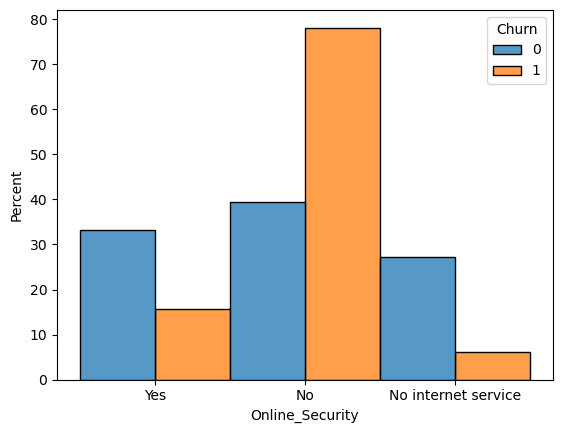

Online_Backup
Online_Backup        Churn
No                   0        1855
                     1        1233
No internet service  0        1413
                     1         113
Yes                  0        1906
                     1         523
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


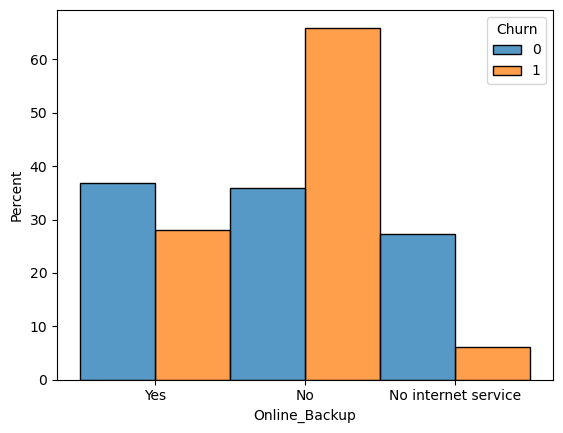

Device_Protection
Device_Protection    Churn
No                   0        1884
                     1        1211
No internet service  0        1413
                     1         113
Yes                  0        1877
                     1         545
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


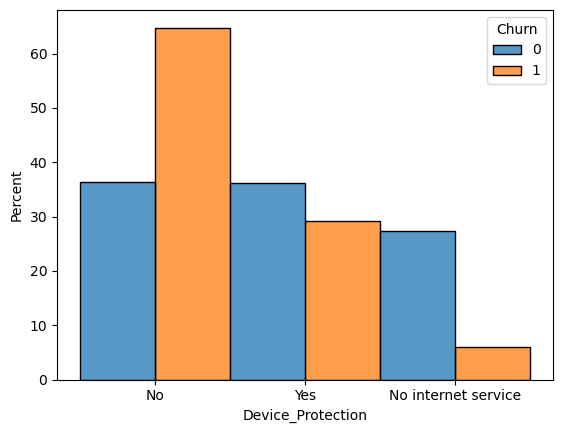

Tech_Support
Tech_Support         Churn
No                   0        2027
                     1        1446
No internet service  0        1413
                     1         113
Yes                  0        1734
                     1         310
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


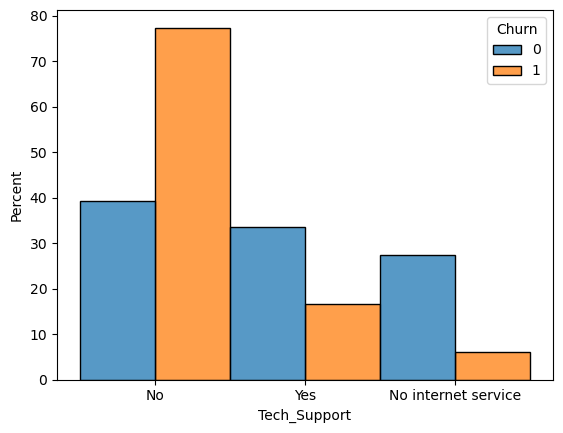

Streaming_TV
Streaming_TV         Churn
No                   0        1868
                     1         942
No internet service  0        1413
                     1         113
Yes                  0        1893
                     1         814
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


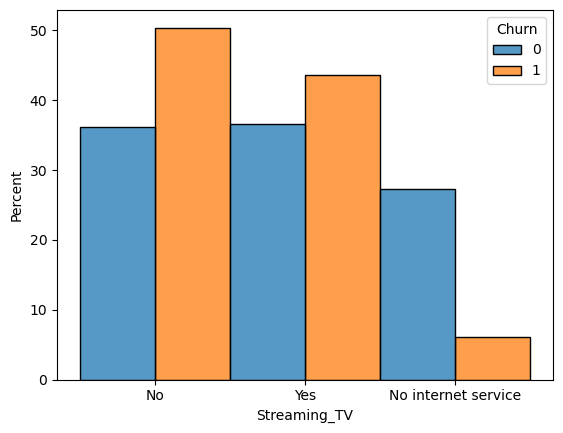

Streaming_Movies
Streaming_Movies     Churn
No                   0        1847
                     1         938
No internet service  0        1413
                     1         113
Yes                  0        1914
                     1         818
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


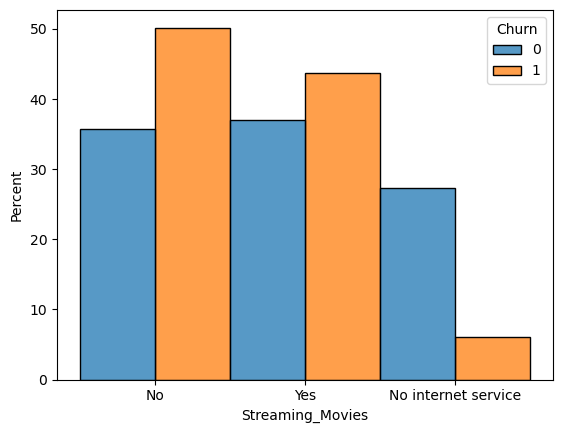

Contract
Contract        Churn
Month-to-month  0        2220
                1        1655
One year        0        1307
                1         166
Two year        0        1647
                1          48
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


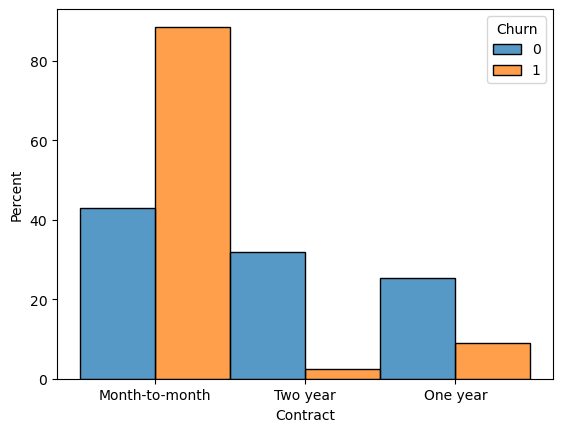

Paperless_Billing
Paperless_Billing  Churn
No                 0        2403
                   1         469
Yes                0        2771
                   1        1400
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


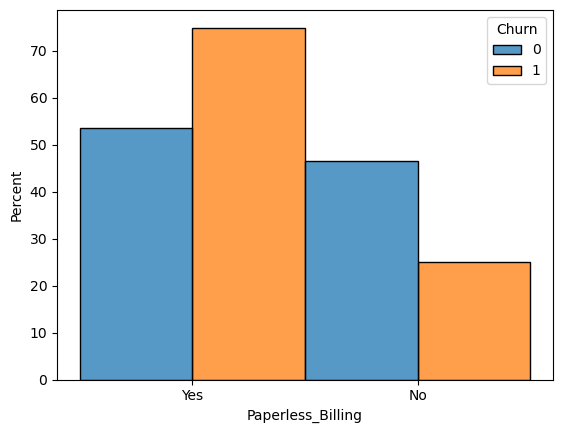

Payment_Method
Payment_Method             Churn
Bank transfer (automatic)  0        1286
                           1         258
Credit card (automatic)    0        1290
                           1         232
Electronic check           0        1294
                           1        1071
Mailed check               0        1304
                           1         308
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


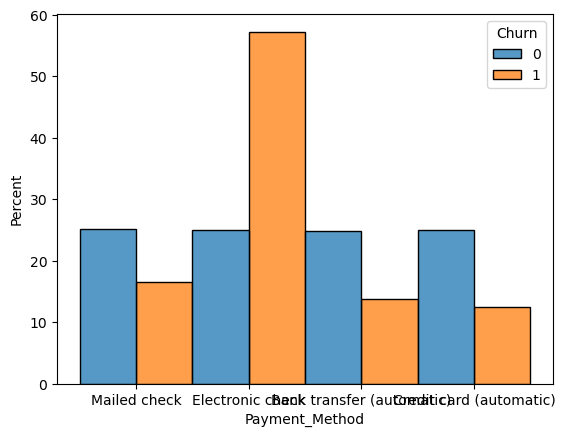

In [57]:
cols=['Senior_citizen','Partner','Dependents','Phone_Service','Multiple_Lines','Online_Security','Online_Backup','Device_Protection','Tech_Support','Streaming_TV','Streaming_Movies','Contract','Paperless_Billing','Payment_Method']

for i in cols:
    print(i)
    print(churn.groupby(churn[i]).Churn.value_counts())
    print(sns.histplot(x = churn[i],data = churn,hue = 'Churn',stat = 'percent',multiple = 'dodge',common_norm = False))
    plt.show()


In [58]:
churn[churn['Churn']==0]['Payment_Method'].value_counts(normalize = True).to_frame().reset_index()

,Payment_Method,proportion
0,Mailed check,0.252029
1,Electronic check,0.250097
2,Credit card (automatic),0.249324
3,Bank transfer (automatic),0.248550


In [59]:
churn[churn['Churn']==1]['Payment_Method'].value_counts(normalize = True).to_frame().reset_index()

,Payment_Method,proportion
0,Electronic check,0.573034
1,Mailed check,0.164794
2,Bank transfer (automatic),0.138042
3,Credit card (automatic),0.124131


Churn rate is higher in electronic check i.e., is online payment mode

In [61]:
churn.head(1)

,CustomerID,Count,Country,State,City,Zip_Code,Lat_long,Latitude,Longitude,Gender,Senior_citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Admin_Tickets,Tech_tickets,Churn_Label,Churn,Churn_Score,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,0.0,0.0,Yes,1,86,3239


### Now will perform heat map for numerical features

In [62]:
non_num_cols = ['Count','Zip_Code','Lat_long','Admin_Tickets','Tech_tickets']
cols = churn.describe().columns.to_list() 
num_cols = [i  for i in cols if i not in non_num_cols]

<Axes: >

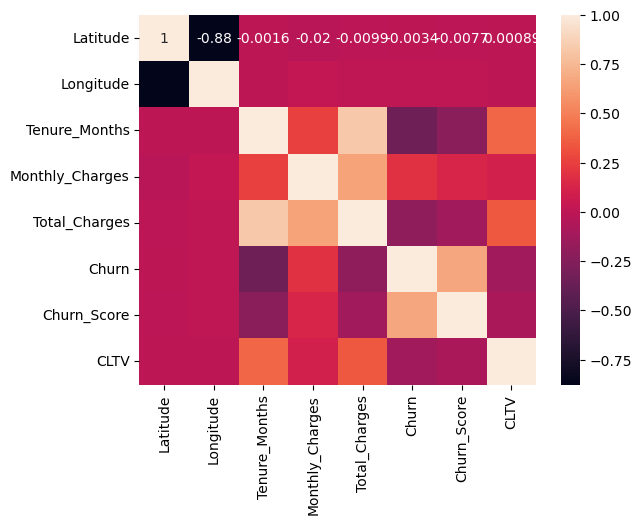

In [63]:
sns.heatmap(churn[num_cols].corr(),annot = True)

#### Simplifying Churn Dataset by Dropping Redundant Columns and unnecessary columns

In [64]:
drop_cols=churn[['CustomerID','City','Count','Country','State','Zip_Code','Lat_long','Dependents','Paperless_Billing','Admin_Tickets','Tech_tickets','Churn_Label']]

df1 = churn.drop(drop_cols,axis=1)
df1


,Latitude,Longitude,Gender,Senior_citizen,Partner,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn_Score,CLTV
0,33.964131,-118.272783,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108,1,86,3239
1,34.059281,-118.307420,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151,1,67,2701
2,34.048013,-118.293953,Female,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Electronic check,99.65,820,1,86,5372
3,34.062125,-118.315709,Female,No,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Electronic check,104.80,3046,1,84,5003
4,34.039224,-118.266293,Male,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Bank transfer (automatic),103.70,5036,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34.341737,-116.539416,Female,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Bank transfer (automatic),21.15,1419,0,45,5306
7039,34.667815,-117.536183,Male,No,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check,84.80,1990,0,59,2140
7040,34.559882,-115.637164,Female,No,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic),103.20,7362,0,71,5560
7041,34.167800,-116.864330,Female,No,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Electronic check,29.60,346,0,59,2793


In [65]:
df1.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [66]:
df1.Churn.value_counts(normalize=True)*100

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

In [67]:
df=pd.get_dummies(df1,drop_first=True).astype('int')
df

,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,Churn,Churn_Score,CLTV,Gender_Male,Senior_citizen_Yes,Partner_Yes,Phone_Service_Yes,Multiple_Lines_No phone service,Multiple_Lines_Yes,Internet_Service_Fiber optic,Internet_Service_No,Online_Security_No internet service,Online_Security_Yes,Online_Backup_No internet service,Online_Backup_Yes,Device_Protection_No internet service,Device_Protection_Yes,Tech_Support_No internet service,Tech_Support_Yes,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Movies_No internet service,Streaming_Movies_Yes,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,33,-118,2,53,108,1,86,3239,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,34,-118,2,70,151,1,67,2701,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,34,-118,8,99,820,1,86,5372,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
3,34,-118,28,104,3046,1,84,5003,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
4,34,-118,49,103,5036,1,89,5340,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34,-116,72,21,1419,0,45,5306,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
7039,34,-117,24,84,1990,0,59,2140,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1
7040,34,-115,72,103,7362,0,71,5560,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
7041,34,-116,11,29,346,0,59,2793,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# MODEL BUILDING

In [68]:
X = df.drop('Churn',axis = 1)
y = df['Churn']

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4930, 32), (2113, 32), (4930,), (2113,))

In [70]:
lr_non_oversampled = LogisticRegression()
lr_non_oversampled.fit(X_train, y_train)

LogisticRegression()

In [71]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report


Logistic Regression Classifier :
Accuracy_train: 0.9046653144016227
Accuracy: 0.9119734973970658
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1559
           1       0.84      0.81      0.83       554

    accuracy                           0.91      2113
   macro avg       0.89      0.88      0.88      2113
weighted avg       0.91      0.91      0.91      2113



Text(0.5, 1.0, 'Confusion Matrix- Logistic Regression Classifier ')

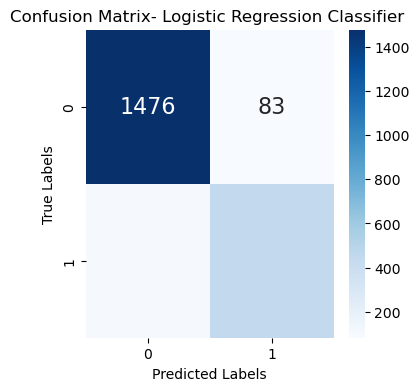

In [73]:
# Predictions
# Make predictions on the non-oversampled test set
y_train_pred_non_oversampled = lr_non_oversampled.predict(X_train)
y_train_proba_non_oversampled = lr_non_oversampled.predict_proba(X_train)[:, 1]
y_pred_non_oversampled = lr_non_oversampled.predict(X_test)
y_proba_non_oversampled_lr = lr_non_oversampled.predict_proba(X_test)[:, 1]

# Create confusion matrix for non-oversampled model
accuracy = accuracy_score(y_test, y_pred_non_oversampled)
accuracy_train=accuracy_score(y_train,y_train_pred_non_oversampled)
cm_non_oversampled = confusion_matrix(y_test, y_pred_non_oversampled)
classification_report_result = classification_report(y_test, y_pred_non_oversampled)

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled_lr)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled_lr)

# Evaluate the non-oversampled model
print("\nLogistic Regression Classifier :")
print(f"Accuracy_train: {accuracy_train}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_non_oversampled))

# Create heatmap for non-oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm_non_oversampled, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Logistic Regression Classifier ')


In [74]:
y_test.value_counts()

Churn
0    1559
1     554
Name: count, dtype: int64

### Observation:-
     
=> Accuracy is approximately 91%            

### DECISION TREE MODEL

In [75]:
# Create and train a Decision Tree classifier on the non-oversampled data
dt_non_oversampled = DecisionTreeClassifier()
dt_non_oversampled.fit(X_train, y_train)

DecisionTreeClassifier()


Decision Tree Classifier :
Accuracy_train: 1.0
Accuracy: 0.9096071935636536
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1559
           1       0.84      0.81      0.82       554

    accuracy                           0.91      2113
   macro avg       0.89      0.88      0.88      2113
weighted avg       0.91      0.91      0.91      2113



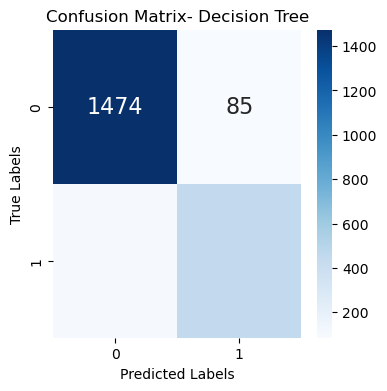

In [76]:
# Predict probabilities on the non-oversampled test set

y_train_pred_non_oversampled = dt_non_oversampled.predict(X_train)
y_train_proba_non_oversampled = dt_non_oversampled.predict_proba(X_train)[:, 1]
y_pred_non_oversampled = dt_non_oversampled.predict(X_test)
y_proba_non_oversampled = dt_non_oversampled.predict_proba(X_test)[:, 1]

# Create confusion matrix for non-oversampled model
accuracy_train=accuracy_score(y_train,y_train_pred_non_oversampled)
accuracy = accuracy_score(y_test, y_pred_non_oversampled)
cm_non_oversampled = confusion_matrix(y_test, y_pred_non_oversampled)
classification_report_result = classification_report(y_test, y_pred_non_oversampled)

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled)

# Create heatmap for non-oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm_non_oversampled, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Decision Tree')

# Evaluate the non-oversampled model
print("\nDecision Tree Classifier :")
print(f"Accuracy_train: {accuracy_train}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_non_oversampled))

### Random Forest classifier

In [77]:
# Create and train a Random Forest classifier on the non-oversampled data
rf_non_oversampled = RandomForestClassifier()
rf_non_oversampled.fit(X_train, y_train)

RandomForestClassifier()


Random Forest Classifier :
Accuracy_train: 0.9690366972477065
Accuracy: 0.9670231729055259
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       561
           1       0.99      0.94      0.97       561

    accuracy                           0.97      1122
   macro avg       0.97      0.97      0.97      1122
weighted avg       0.97      0.97      0.97      1122



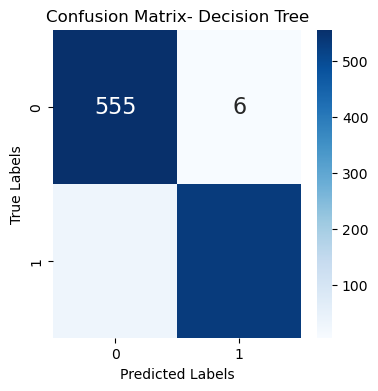

In [141]:
# Predict probabilities on the non-oversampled test set
y_train_pred_non_oversampled = rf_non_oversampled.predict(X_train)
y_train_proba_non_oversampled = rf_non_oversampled.predict_proba(X_train)[:, 1]
y_pred_non_oversampled = rf_non_oversampled.predict(X_test)
y_proba_non_oversampled = rf_non_oversampled.predict_proba(X_test)[:, 1]

# Create confusion matrix for non-oversampled model
accuracy = accuracy_score(y_test, y_pred_non_oversampled)
accuracy_train=accuracy_score(y_train,y_train_pred_non_oversampled)
cm_non_oversampled = confusion_matrix(y_test, y_pred_non_oversampled)
classification_report_result = classification_report(y_test, y_pred_non_oversampled)

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled)

# Create heatmap for non-oversampled model
plt.figure(figsize=(4, 4))
sns.heatmap(cm_non_oversampled, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Decision Tree')

# Evaluate the non-oversampled model
print("\nRandom Forest Classifier :")
print(f"Accuracy_train: {accuracy_train}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred_non_oversampled))

# ROC Curve for all models

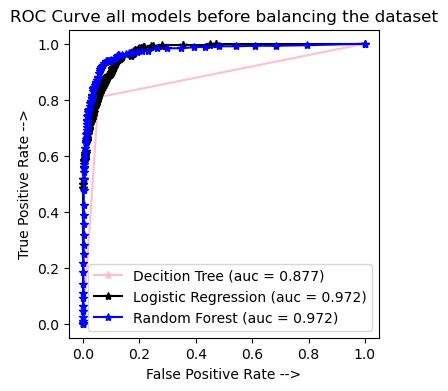

In [79]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the non-oversampled test set (Logistic Regression)
y_proba_non_oversampled_lr = lr_non_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled_lr, tpr_non_oversampled_lr, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled_lr)
auc_non_oversampled_lr = roc_auc_score(y_test, y_proba_non_oversampled_lr)

# Predict probabilities on the non-oversampled test set (Random Forest)
y_proba_non_oversampled_rf = rf_non_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled_rf, tpr_non_oversampled_rf, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled_rf)
auc_non_oversampled_rf = roc_auc_score(y_test, y_proba_non_oversampled_rf)

# Predict probabilities on the non-oversampled test set (Decision Tree)
y_proba_non_oversampled = dt_non_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_proba_non_oversampled)
auc_non_oversampled = roc_auc_score(y_test, y_proba_non_oversampled)

plt.figure(figsize=(4, 4), dpi=100)
plt.plot(fpr_non_oversampled, tpr_non_oversampled, marker='*',color='pink' ,label='Decition Tree (auc = %0.3f)' % auc_non_oversampled)
plt.plot(fpr_non_oversampled_lr, tpr_non_oversampled_lr, marker='*',color='black' ,label='Logistic Regression (auc = %0.3f)' % auc_non_oversampled_lr)
plt.plot(fpr_non_oversampled_rf, tpr_non_oversampled_rf, marker='*',color='blue' ,label='Random Forest (auc = %0.3f)' % auc_non_oversampled_rf)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC Curve all models before balancing the dataset')
plt.legend(loc='lower right')
plt.legend()
plt.show()


### Data is Imbalanced, making the data balanced using Random Under-Sampling With imblearn

### Splitting and Resampling

In [80]:
X1=df.drop('Churn',axis=1)
y1=df.Churn

In [81]:
print('X1.shape:',X1.shape,'y1.shape:',y1.shape)

X1.shape: (7043, 32) y1.shape: (7043,)


### Under Sampling


In [82]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler


ros=RandomUnderSampler(random_state=0)
X,y=ros.fit_resample(X1,y1)

print('original dataset shape:', y1.value_counts())
print('Resample dataset shape', y.value_counts())

original dataset shape: Churn
0    5174
1    1869
Name: count, dtype: int64
Resample dataset shape Churn
0    1869
1    1869
Name: count, dtype: int64


In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

print('X_train.shape:',X_train.shape,'X_test.shape:',X_test.shape,'y_train.shape:',y_train.shape,'y_test.shape:',y_test.shape)

X_train.shape: (2616, 32) X_test.shape: (1122, 32) y_train.shape: (2616,) y_test.shape: (1122,)


### LogisticRegression

In [97]:
# Fitting or Training the Logistic regression model on the train x and train y data setsabs
LR = LogisticRegression( )
LR.fit(X_train ,y_train)

# Using the trained model to predict on Test data set 
y_LR = LR.predict(X_test)
y_LR_proba=LR.predict_proba(X_test)[:,1]

# Evaluating the performance metrics like accuracy , precision, recall and F1 Score
# Accuracy of the LR model on test data, it tells us about the overall performance of the model
Accuracy_LR = accuracy_score(y_test , y_LR) * 100 

# Precision is needed because Accuracy is easily influenced by a dominating class. about the predictive performance 
# of a classification model, specifically regarding the positive predictions made by the model.
Precision_LR = precision_score(y_test , y_LR) * 100 

# Recall measures the proportion of actual positive instances (or true positives) that were correctly identified.
Recall_LR = recall_score(y_test , y_LR) * 100 

# The F1 score is the harmonic mean of precision and recall, and it balances the trade-off between these two metrics.abs
# It is not affected by Class Imbalance and True Negative which usually takes up a lot of place in the classification
F1_Score_LR = f1_score(y_test , y_LR) * 100

# Printing the values
print ( "The performance metrics of the Test Data is : \n" )
print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_LR , Precision_LR , Recall_LR , F1_Score_LR) )

The performance metrics of the Test Data is : 

Accuracy = 88.94830659536542%

Precision = 87.60757314974182%

Recall = 90.73083778966132%

F1 Score = 89.14185639229422%


Text(0.5, 1.0, 'Confusion Matrix')

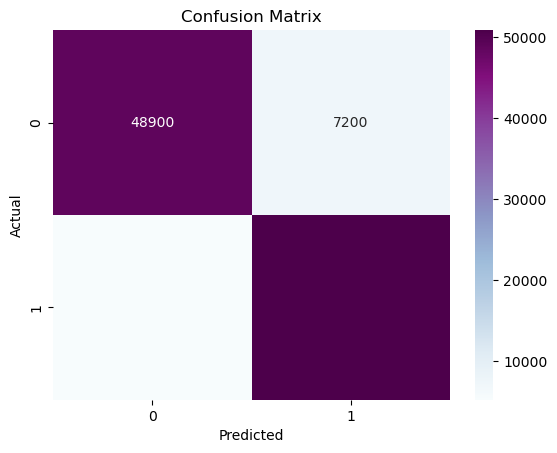

In [85]:
Confusion_Matrix_LR = confusion_matrix(y_test , y_LR) * 100

sns.heatmap(Confusion_Matrix_LR , annot = True , fmt='.0f' , cmap = 'BuPu')

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.title("Confusion Matrix")

# We can see that there is a class imbalace, that is class is underrepresented.

In [87]:
train_predictions = LR.predict(X_train)

test_predictions = LR.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions) * 100

test_accuracy = accuracy_score(y_test, test_predictions) * 100

# If the values are close by or in the same vicinity then there is no overfitting ocurrinabsg

print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

Train Accuracy >> 90.63455657492355

Test Accuracy >> 88.94830659536542


### Decision Tree

In [88]:
# Setting up the parameters in dictionary of lists format, in order to find which parameter provides best results

Parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [ 5, 10],
 }


# Initializing the algorithm
DT = DecisionTreeClassifier()

# Performing grid search, which finds the appropriate parameter iteratively.
grid_search = GridSearchCV( DT, Parameters, cv = 5 )
grid_search.fit(X_train ,y_train)
Params = grid_search.best_params_

# Printing the best parameters 
print("Best Hyperparameters: ", grid_search.best_params_)
print("\nBest Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}

Best Accuracy Score:  0.9281326171675449


In [89]:
# Initializing Decision Tree Algorithm with the best parameters
DT = DecisionTreeClassifier(**Params)
# Training the decision tree algorithm on train data
DT.fit(X_train ,y_train)

# Predicting the target variables on unseen data / test data
threshold = 0.333
Y_DT = DT.predict_proba(X_test)[:, 1] >= threshold

# Performance Metrics : Accuracy , Precision , Recall and F1 score 
Accuracy_DT = accuracy_score( y_test , Y_DT ) * 100 
Precision_DT = precision_score ( y_test , Y_DT ) * 100 
Recall_DT = recall_score ( y_test , Y_DT ) * 100
F1_Score_DT = f1_score ( y_test , Y_DT ) * 100
print ( "The performance metrics of the Test Data is : \n" )
print ( "Accuracy = {} %\n\nPrecision = {} %\n\nRecall = {} %\n\nF1 Score = {} %".format ( Accuracy_DT  , Precision_DT  , Recall_DT  , F1_Score_DT ) )

The performance metrics of the Test Data is : 

Accuracy = 89.75044563279857 %

Precision = 85.39682539682539 %

Recall = 95.90017825311944 %

F1 Score = 90.34424853064651 %


Text(0.5, 1.0, 'Confusion Matrix')

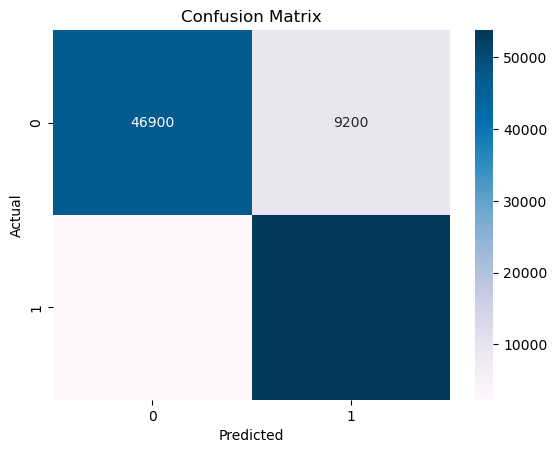

In [90]:
Confusion_Matrix_DT = confusion_matrix ( y_test , Y_DT ) * 100
sns.heatmap ( Confusion_Matrix_DT , annot = True , fmt='.0f' , cmap = 'PuBu' )
plt.xlabel ( "Predicted" )
plt.ylabel ( "Actual" )
plt.title ( "Confusion Matrix" )

In [91]:
# Predict the labels for the training set using the Decision Tree model
train_predictions = DT.predict(X_train)

# Predict the labels for the test set using the Decision Tree  model
test_predictions = DT.predict(X_test)

# Calculate the accuracy of the Decision Tree  model on the training set
train_accuracy = accuracy_score(y_train, train_predictions) * 100

# Calculate the accuracy of the Decision Tree model on the test set
test_accuracy = accuracy_score(y_test, test_predictions) * 100
print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

Train Accuracy >> 93.31039755351682

Test Accuracy >> 89.75044563279857


### Random Forest

In [92]:
# Setting up the parameters in dictionary of lists format, in order to find which parameter provides best results
Parameters = {
    'n_estimators': [ 100 , 300 , 500 ], # Number of trees in the forest
    'max_depth': [None, 5 , 10 , 15 ], # Maximum depth of each tree
    'min_samples_split': [ 5 , 10 , 15]  # Minimum number of samples required to split an internal node    
}

# Create a RandomForestClassifier instance
RF = RandomForestClassifier ( )
# Perform grid search with cross-validation
grid_search = GridSearchCV ( RF, Parameters, cv = 5)
grid_search.fit ( X_train ,y_train )
Params = grid_search.best_params_
# Training model for each combination of the parameters
print("Best Hyperparameters: ", grid_search.best_params_)
print("\nBest Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 500}

Best Accuracy Score:  0.9361581013822194


In [93]:
# Create a Random Forest classifier with specified hyperparameters
RF = RandomForestClassifier ( **Params )
# Train the Random Forest classifier on the training data
RF.fit ( X_train ,y_train )

# Use the trained classifier to predict the labels for the test data
Y_RF = RF.predict (X_test)
threshold = 0.333
Y_RF = RF.predict_proba(X_test)[:, 1] >= threshold

# Calculating Performance Metrics : Accuracy , Precision , Recall and F1 score 
Accuracy_RF = accuracy_score( y_test , Y_RF ) * 100 
Precision_RF = precision_score ( y_test , Y_RF ) * 100 
Recall_RF = recall_score ( y_test , Y_RF ) * 100
F1_Score_RF = f1_score ( y_test , Y_RF ) * 100
print ( "The performance metrics of the Test Data is : \n" )
print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_RF  , Precision_RF  , Recall_RF  , F1_Score_RF ) )

The performance metrics of the Test Data is : 

Accuracy = 90.01782531194296%

Precision = 85.13302034428794%

Recall = 96.96969696969697%

F1 Score = 90.66666666666666%


Text(0.5, 1.0, 'Confusion Matrix')

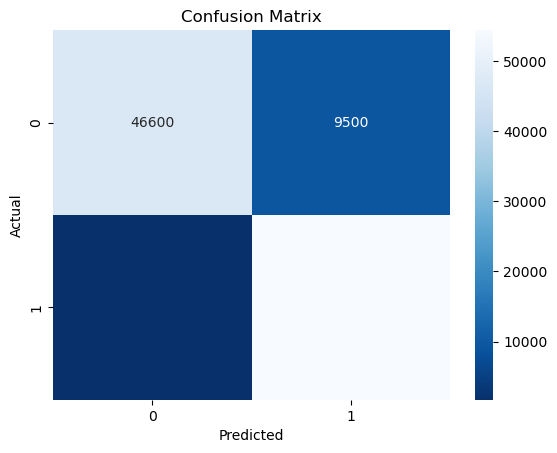

In [94]:
Confusion_Matrix_RF = confusion_matrix ( y_test , Y_RF ) * 100

sns.heatmap ( Confusion_Matrix_RF , annot = True , fmt='.0f' , cmap = 'Blues_r' )

plt.xlabel ( "Predicted" )

plt.ylabel ( "Actual" )

plt.title ( "Confusion Matrix" )


In [95]:
# Predict the labels for the training set using the Random Forest model
train_predictions = RF.predict(X_train)
# Predict the labels for the test set using the Random Forest model
test_predictions = RF.predict(X_test)
# Calculate the accuracy of the Random Forest model on the training set
train_accuracy = accuracy_score(y_train, train_predictions) * 100
# Calculate the accuracy of the Random Forest model on the valiidation set
test_accuracy = accuracy_score(y_test, test_predictions) * 100
print ( "Train Accuracy >> {}\n\nTest Accuracy >> {}".format ( train_accuracy , test_accuracy ) )

Train Accuracy >> 98.62385321100918

Test Accuracy >> 90.73083778966132


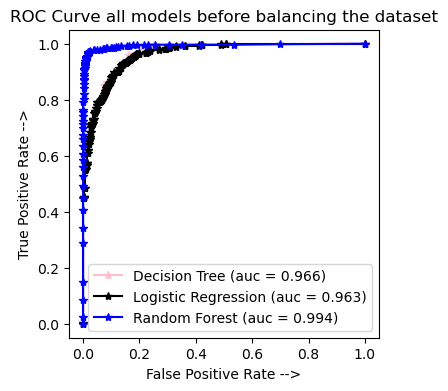

In [98]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the non-oversampled test set (Logistic Regression)
y_LR_proba = LR.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_lr, tpr_lr, thresholds_lr= roc_curve(y_test, y_LR_proba)
auc_lr = roc_auc_score(y_test, y_LR_proba)

# Predict probabilities on the non-oversampled test set (Random Forest)
Y_RF = rf_non_oversampled.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, Y_RF)
auc_rf = roc_auc_score(y_test, Y_RF)

# Predict probabilities on the non-oversampled test set (Decision Tree)
Y_DT = DT.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr, tpr, thresholds = roc_curve(y_test, Y_DT)
auc = roc_auc_score(y_test, Y_DT)

plt.figure(figsize=(4, 4), dpi=100)
plt.plot(fpr, tpr, marker='*',color='pink' ,label='Decision Tree (auc = %0.3f)' % auc)
plt.plot(fpr_lr, tpr_lr, marker='*',color='black' ,label='Logistic Regression (auc = %0.3f)' % auc_lr)
plt.plot(fpr_rf, tpr_rf, marker='*',color='blue' ,label='Random Forest (auc = %0.3f)' % auc_rf)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC Curve all models before balancing the dataset')
plt.legend(loc='lower right')
plt.legend()
plt.show()
